In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import FloatProgress
from IPython.display import display
from time import sleep
fp = FloatProgress(min=0, max=100)
rng = np.random.default_rng()
pd.options.display.float_format = '{:6.4f}'.format

In [2]:
sample_size = 1000000

In [3]:
sample_sizes = list()
inlegrals = list()
μ_list = list()
dimentions_list = list()
n_dimentions_list = np.arange(2,15)
μs = np.arange(-2.0,0.00001,0.05)
print("Progress bar")
display(fp)
count = n_dimentions_list.sum() * μs.size
i = 0
for n_dimentions in n_dimentions_list:
    for μ in μs:
        fp.value = 100.0 * i / count
        i += n_dimentions
        sample = rng.normal(loc=μ, size=(sample_size, n_dimentions))
        norm_L1 = sample.cumsum(axis=1)
        norm_L1[:,-1] = sample[:,-1]
        filter_L1 = np.all(norm_L1 > 0.0, axis=1)
        sample_size_temp = filter_L1.sum()
        sample[np.logical_not(filter_L1),-1] = 0.0
        integral_temp = sample[:,-1].mean()
        μ_list.append(μ)
        dimentions_list.append(n_dimentions)
        sample_sizes.append(sample_size_temp)
        inlegrals.append(integral_temp)
relationship = pd.DataFrame({'Sample size': sample_sizes, 'Integral': inlegrals, '# dimentions': dimentions_list, 'μ': μ_list})

Progress bar


FloatProgress(value=0.0)

In [4]:
print(relationship)

     Sample size  Integral  # dimentions       μ
0            522    0.0002             2 -2.0000
1            667    0.0003             2 -1.9500
2            863    0.0003             2 -1.9000
3           1041    0.0004             2 -1.8500
4           1369    0.0006             2 -1.8000
..           ...       ...           ...     ...
528        25242    0.0186            14 -0.2000
529        34247    0.0257            14 -0.1500
530        45771    0.0349            14 -0.1000
531        61060    0.0477            14 -0.0500
532        77513    0.0618            14  0.0000

[533 rows x 4 columns]


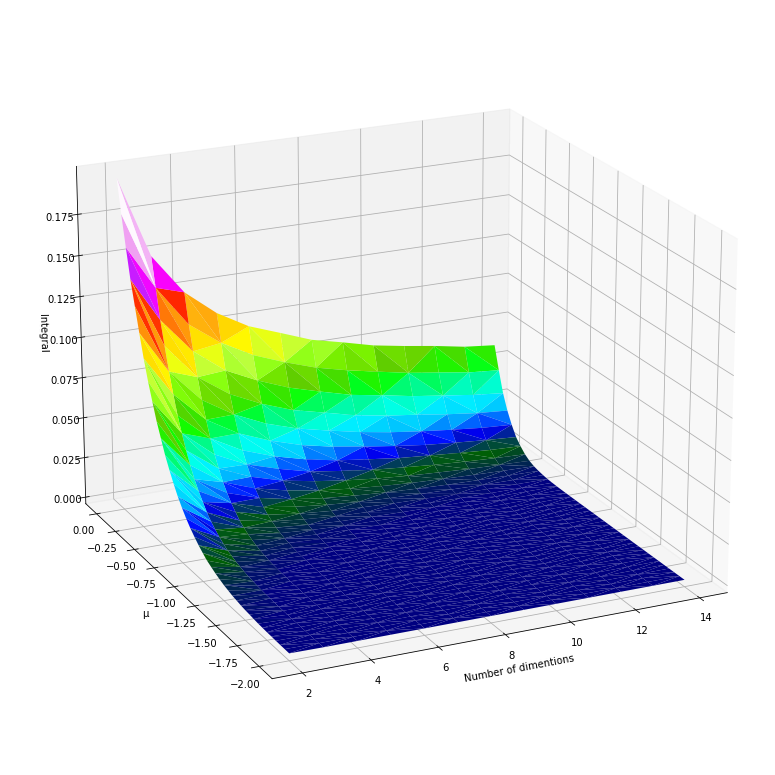

In [5]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(
                relationship['# dimentions'], 
                relationship['μ'], 
                relationship['Integral'],
                cmap=cm.gist_ncar)



ax.view_init(20, -115)


ax.set_xlabel('Number of dimentions')
ax.set_ylabel('μ')
ax.set_zlabel('Integral')
plt.show()